We will be analyzing the **Titanic data** from Kaggle found on the below link
<br>
https://www.kaggle.com/c/titanic/data <br>
We will be analysing the below question:

## Primary Question :) What are the characteristics of the passengers who survived the Titanic?##

We will ask ask questions and try to answer them based on our above **Super Question**.

The below code will import **numpy** and **pandas** which we will be using heavily for our analysis along with other libraries.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean(df):
    '''
    The clean() function does the cleaning for us. It takes in a dataframe and returns a cleaned and processes dataframe.
    It does 3 things:

    1. To handle missing values, below function will fill all NaNs with 0s.
    2. The function will also remove the columns on which we will not be performing analysis and return a cleaned DataFrame. 
       The columns are Name and Ticket columns.
    3. For our later analysis, it adds another column ('Sex and  Pclass') in our DataFrame which is
       the combination of columns 'Sex' and 'Pclass'. Below are it's values and it's associated meanings: 
    
    a. female1 --> Passenger is a female travelling in Passenger Class 1
    b. female2 --> Passenger is a female travelling in Passenger Class 2
    c. female3 --> Passenger is a female travelling in Passenger Class 3
    d. male1   --> Passenger is a male travelling in Passenger Class 1
    e. male2   --> Passenger is a male travelling in Passenger Class 2
    f. male3   --> Passenger is a male travelling in Passenger Class 3
    '''
    df = df_old.drop(['Name', 'Ticket'], axis = 1)
    df = df.fillna(0)
    df['Sex and Pclass'] = df['Sex'].map(str) + df['Pclass'].map(str)
    return df

In [3]:
def count_of_survived(df):
    '''
    The count_of_survived() function will be used for plotting the total number of passengers survived and not survived.
    It takes in the dataframe and displays the pie chart.
    '''
    total_passengers = len(df['Survived'])
    survived_df = df.groupby(['Survived']).size()
    count_survived = survived_df[1]
    count_notsurvived = survived_df[0]
    print 'Based on the sample of data, {} people survived the Titanic whereas {} did not.\n'.format(count_survived, count_notsurvived)
    print survived_df
    
    explode = (0.1, 0)
    labels = 'Not Survived', 'Survived'
    colors = ['gold', 'lightskyblue']

    pie_chart = survived_df.plot.pie(explode=explode, labels=labels, colors=colors,
            autopct='%1.2f%%', shadow=True, startangle = 90)
    pie_chart.axis('equal')
    pie_chart.set_ylabel('')
    plt.show()

In [4]:
file_path = r'C:\Users\Admin\Downloads\titanic-data.csv'

#Reading the csv into a dataframe
df_old = pd.read_csv(file_path)

Based on the sample of data, 342 people survived the Titanic whereas 549 did not.

Survived
0    549
1    342
dtype: int64


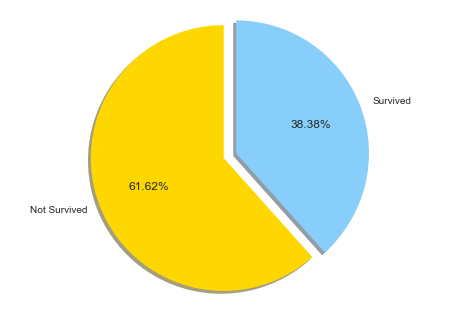

In [5]:
#Cleaning the DataFrame and calling the plotting function
df = clean(df_old)
count_of_survived(df)

The above output says that **342 people** survived the Titanic. It is clear from the above pie chart that **38.38 % survived** the Titanic while **61.62% did not survive**. We will be finding out which characteristics of passengers made them more likely to survive.

When the Titanic starting sinking, it was decided that women be saved first by loading them first in lifeboats as is decribed on the page https://en.wikipedia.org/wiki/RMS_Titanic. <br>
We will see below how this decision of **women's safety first** affected their survival rate.

### Question 1 :) Was being a female one of the factor of surviving the titanic? ###

In [6]:
df1 = pd.crosstab(df['Sex'], df['Survived'])
print df1

Survived    0    1
Sex               
female     81  233
male      468  109


The DataFrame above shows that maximum of females survived whereas the males did not share the same fate. We will look at this use a bar chart below.

In [7]:
def bar_by_column(df_temp, col):
    '''
    The function bar_by_column() takes as parameters, the temporary dataframe created earlier (using crosstab()) 
    and the column name based on which we want to create a bar graph. This function will do the plotting for us.
    '''
    values_list = sorted(df[col].unique())                      # list of unique values for the column
    title_name = 'Survival by '+ col

    bars = df_temp.plot.bar(stacked = True)
    bars.set_title(title_name)
    bars.set_ylabel('Frequency')
    bars.set_xticklabels(values_list, rotation = 0)
    handles, _ = bars.get_legend_handles_labels()
    bars.legend(handles, ['Not Survived', 'Survived'], title = '')
    plt.show()

In [8]:
def get_survived_percent(df_temp):
    '''
    This function takes as parameters, the temporary dataframe created earlier (using crosstab()) and
    returns a list of survival percentages.
    '''
    survived_percent = list()
    for ind in df_temp.index.values:
        total = df_temp.loc[ind].sum()
        survived = df_temp[1][ind]
        survived_percent.append((float(survived) / float(total)) * 100)
    return survived_percent

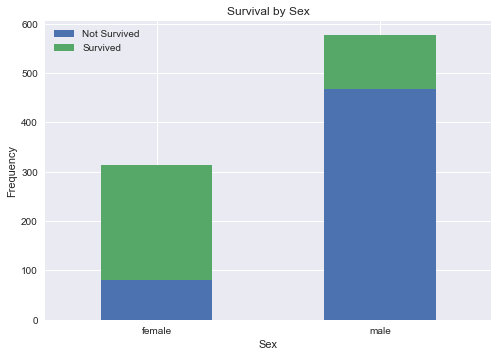

Of the total number of females, 74.2038216561 % of females survived the disaster.For males, it was only 18.8908145581 %.


In [9]:
bar_by_column(df1, 'Sex')
survived_percent = get_survived_percent(df1)
print 'Of the total number of females, {} % of females survived the disaster.\
For males, it was only {} %.'.format(survived_percent[0], survived_percent[1])

It is clear from the above figures that the decision of **saving women first did prove to be fruitful.**

### Answer 1 :) We can then conclude that one of the factors which affected the passengers' survival was being a female. ###

<br>
<br>
**Passenger Class ('Pclass')** was directly proportional to the **socio economic status** of the passenger. <br>
Passenger travelling in Pclass 1 was on the topmost rung of the socio economic ladder followed by passengers of Pclass 2 and Pclass 3. This may have affected the survival rate of each class.

### Question 2 :) Was the survival of passengers based on the Passenger Class they travelled? ###

We will try to answer the question using the functions **survival_by_column()** and **bar_by_column()** defined above.

In [10]:
df2 = pd.crosstab(df['Pclass'], df['Survived'])
print df2

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


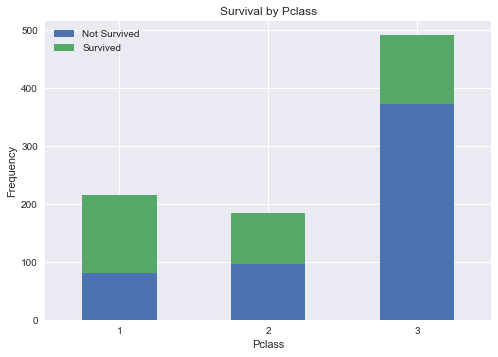

Of the total number of class 3 passengers, only 24.2362525458 % survived the disaster.For class 1 and class 2, it was 62.962962963 % and 47.2826086957 % respectively,each much higher than class 3.


In [11]:
bar_by_column(df2, 'Pclass')
survived_percent = get_survived_percent(df2)

print 'Of the total number of class 3 passengers, only {} % survived the disaster.\
For class 1 and class 2, it was {} % and {} % respectively,\
each much higher than class 3.'.format(survived_percent[2], survived_percent[0], survived_percent[1])

It can be seen that passengers of **class 3 were the ones with least survival rate** followed by class 2 and class 1. So, the class system played a role in survival of the disaster.

### Answer 2 :) We can conclude that another factor which affected the passengers' survival negatively was being in a Passenger Class 3. ###

Based on the above two question-answers, we can pose another question.

### What if a passenger was a **female and also not travelling in Passenger Class3**? How many of such passengers survived?###

In [12]:
df3 = pd.crosstab(df['Sex and Pclass'], df['Survived'])
print df3

Survived          0   1
Sex and Pclass         
female1           3  91
female2           6  70
female3          72  72
male1            77  45
male2            91  17
male3           300  47


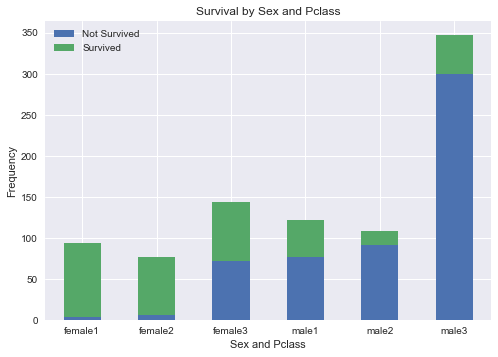

96.8085106383 % and 92.1052631579% Females travelling in Passenger Class 1 and Class2 survived while 50.0 % females of Class 3 did not.


In [13]:
bar_by_column(df3, 'Sex and Pclass')
survived_percent = get_survived_percent(df3)
print '{} % and {}% Females travelling in Passenger Class 1 and Class2 \
survived while {} % females of Class 3 did not.'.format(survived_percent[0], survived_percent[1], survived_percent[2])

Before getting on to the conclusion, one must note the below limitations of the analysis.
<br><br>
**Limitations**: <br>The above analysis is only based on the data provided. <br>
According to http://www.titanicfacts.net/titanic-passengers.html, there were 2222 people on board the Titanic. So, the provided data is just a small sample of the whole dataset; i.e; **all the people** are not in the available data because of which we cannot conclude for the whole population. There may be other samples of the population for which above analysis may not hold true. <br>
We should also not forget about lurking variables in the form of more features of the data. More features of the data will open new windows for analysis. <br>
Moreover, correlation in the above data does not necessarily mean causation. In depth analysis of the whole dataset with more features is definitely required here.

## Conclusion :) It is then clear from the above graphs that the factors most relevant for survival of Titanic is being a female and *not* travelling in Passenger Class 3.##